# 1)Project - Bike Rental Shares Analysis

# Aim:
The aim of the rental bike share prediction project is to develop a robust and accurate predictive model that forecasts the demand for rental bikes in a bike-sharing system. This model will help optimize the distribution and availability of bikes, ensuring improved service efficiency and user satisfaction.

# Objectives:

i) Develop a highly accurate predictive model that can reliably forecast bike rental demand based on historical data, weather conditions, time of day, and other relevant factors.

ii) Optimize the distribution and availability of rental bikes across different docking stations to meet predicted demand, reducing instances of bike shortages and surpluses.


# Attribute Information

1)datetime: 
Description: The date and time of the record.
Format: Typically in "YYYY-MM-DD HH:MM
" format.
Example: "2012-01-01 00:00:00".



2)season:
Description: The season of the year when the data was recorded.
Values:
1: Spring
2: Summer
3: Fall
4: Winter
Example: 2 (Summer).


3)holiday:
Description: Indicates whether the day is a holiday.
Values:
0: No
1: Yes
Example: 0 (Not a holiday).


4)workingday:
Description: Indicates whether the day is a working day.
Values:
0: No (weekends and holidays)
1: Yes (neither weekend nor holiday)
Example: 1 (Working day).


5)weather:
Description: Describes the weather situation.
Values:
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Example: 1 (Clear or partly cloudy).



6)temp:
Description: Temperature in Celsius.
Range: Typically from -30 to 50.
Example: 22.14 (22.14°C).



7)atemp:
Description: Apparent temperature (feels-like temperature), adjusted for factors like humidity and wind.
Range: Typically from -30 to 50.
Example: 25.76 (25.76°C).



8)humidity:
Description: Humidity percentage.
Range: 0 to 100.
Example: 80 (80% humidity).



9)windspeed:
Description: Wind speed.
Units: m/s (meters per second).
Range: Generally 0 to 67.
Example: 12.998 (12.998 m/s).


10)casual:
Description: Number of casual users (unregistered, non-regular users).
Type: Integer.
Example: 331 (331 casual users).


11)registered:
Description: Number of registered users (regular, subscribed users).
Type: Integer.
Example: 1234 (1234 registered users).


12)count:
Description: Total number of bike rentals (sum of casual and registered).
Type: Integer.
Example: 1565 (total rentals).

# 2) Loading the data and basic inference

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date
import calendar

In [2]:
train_df = pd.read_csv(r'C:\Users\jay\Desktop\Data Science\ML project\Bike Rental Demand Analysis\Dataset\train.csv')

In [3]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19-12-2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,19-12-2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,19-12-2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,19-12-2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
train_df.shape

(10886, 12)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# 3) Data Preprocessing

In [6]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
train_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

### Changing into datetime format

In [8]:
train_df = pd.read_csv(r'C:\Users\jay\Desktop\Data Science\ML project\Bike Rental Demand Analysis\Dataset\train.csv')
train_df = pd.DataFrame(train_df)

def change_into_datetime(col):
    try:
        train_df[col] = pd.to_datetime(train_df[col], dayfirst=True, errors='coerce')
    except Exception as e:
        print(f"Error converting column {col}: {e}")

for col in ['datetime']:
    change_into_datetime(col)

In [9]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [10]:
train_df['date'] = pd.to_datetime(train_df['datetime']).dt.date
train_df['month'] = train_df['datetime'].dt.month
train_df['year'] = train_df['datetime'].dt.year
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day of the week'] = train_df['datetime'].dt.dayofweek

In [11]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,year,hour,day of the week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,2011,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,2011,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,2011,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,2011,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,2011,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,12,2012,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,12,2012,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,12,2012,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,12,2012,22,2


In [12]:
train_df['year'].unique()

array([2011, 2012])

### Mapping key values to Dictionary

In [13]:
dict = {2011 :'1', 2012 :'2'}

In [14]:
train_df['year'] = train_df['year'].map(dict)
train_df['year'].unique()

array(['1', '2'], dtype=object)

In [15]:
train_df.drop('datetime',axis=1,inplace=True)

In [16]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,year,hour,day of the week
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,1,4,5


# 4)Performing Exploratory Data Analysis 

In [17]:
train_df.drop('count',axis=1).describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,month,hour,day of the week
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,6.521495,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,3.444373,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,4.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,7.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,10.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,12.000000,23.000000,6.000000


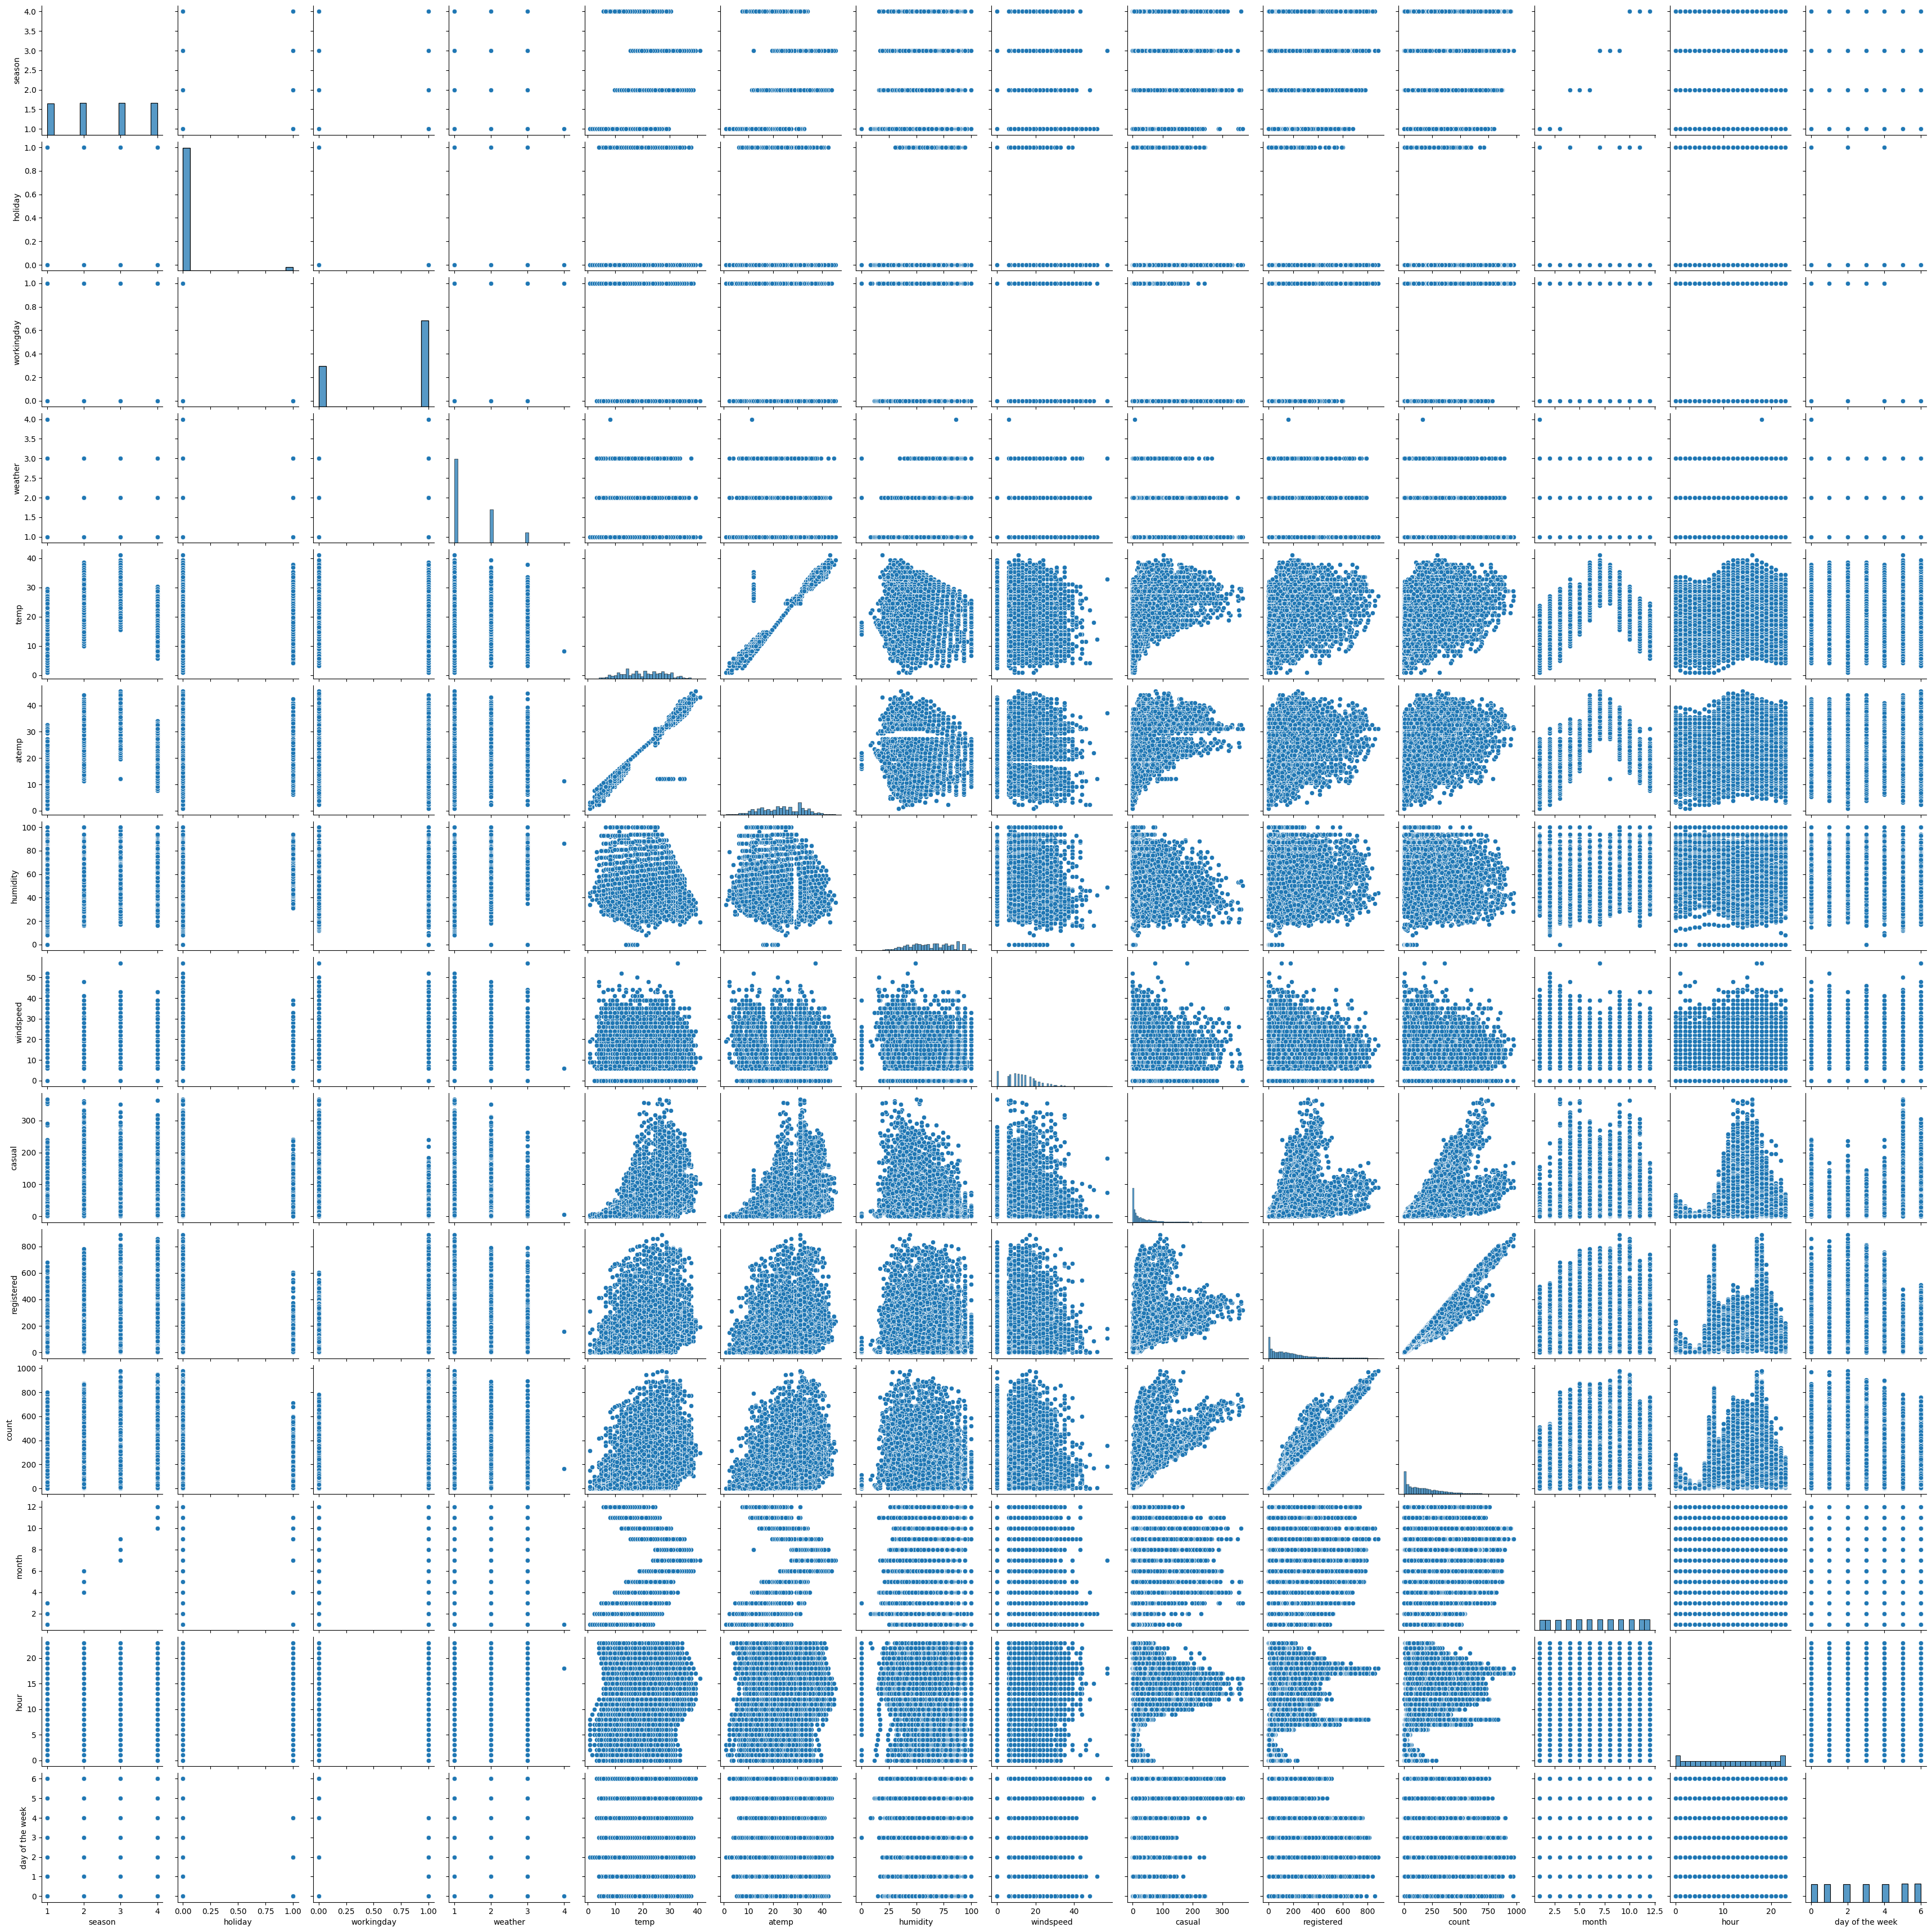

In [18]:
sns.pairplot(train_df);

Here we can see the pairwise relationships between variables and correlations as well relationships between multiple variables in a dataset.

### Visualizing the Demand using multiple variables

###  Demand per day of the week

C:\Users\jay\AppData\Local\Temp\ipykernel_8088\2489016883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x = 'day of the week', y = 'count', palette='rainbow');


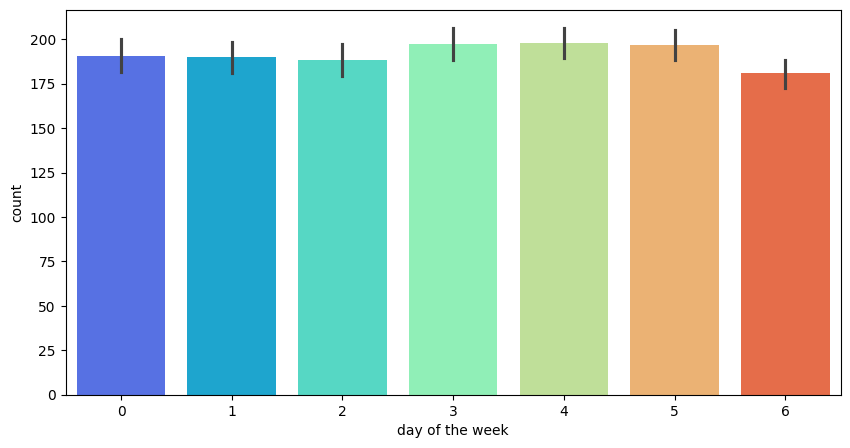

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=train_df, x = 'day of the week', y = 'count', palette='rainbow');

demand of bike rentals were almost same for each day of the week. So this feature will not be useful in predicting the demand therefore we will have to drop this feature.

### Demand per month

C:\Users\jay\AppData\Local\Temp\ipykernel_8088\2999574858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x='month', y = 'count', palette = 'rainbow');


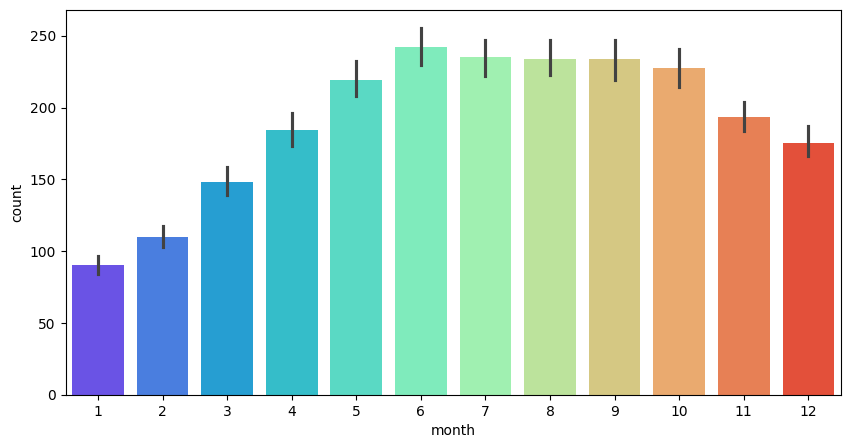

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(data=train_df, x='month', y = 'count', palette = 'rainbow');

Demand for bike rentals was high during the months of summer and the demand drops during the months of winter.

### Year Month Demand

In [21]:
group_year_month = train_df.groupby(['year','month'])
average_year_month = group_year_month['count'].mean()

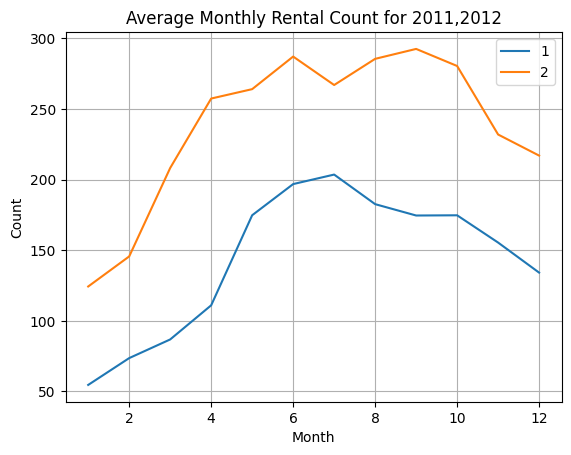

In [22]:
for year in average_year_month.index.levels[0]:
    plt.plot(average_year_month[year].index,average_year_month[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Monthly Rental Count for 2011,2012')
plt.show()

Demand for bike rentals was high in 2012 as compares to 2011 the bikes demand is high

### Demand per hour

C:\Users\jay\AppData\Local\Temp\ipykernel_8088\391144996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = train_df, x = 'hour', y = 'count', palette = 'rainbow');


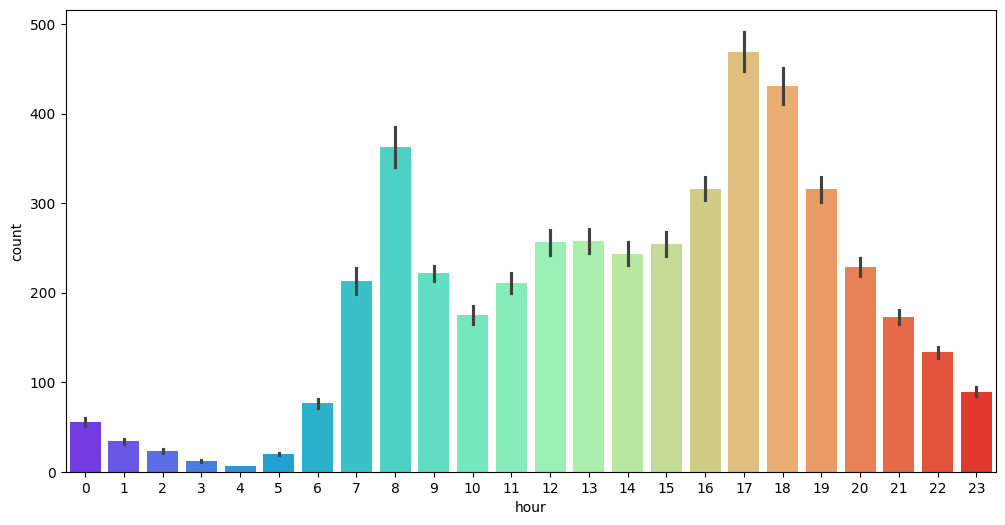

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(data = train_df, x = 'hour', y = 'count', palette = 'rainbow');

Demand for bike rentals were high during the office hours and it was low during the non-working hours as it might be possible that most of the people use the bike rental services to reach their office premises or leave their premises during these hours.

### Year Hour Demand 

In [24]:
group_year_hour = train_df.groupby(['year','hour'])
average_year_hour = group_year_hour['count'].mean()

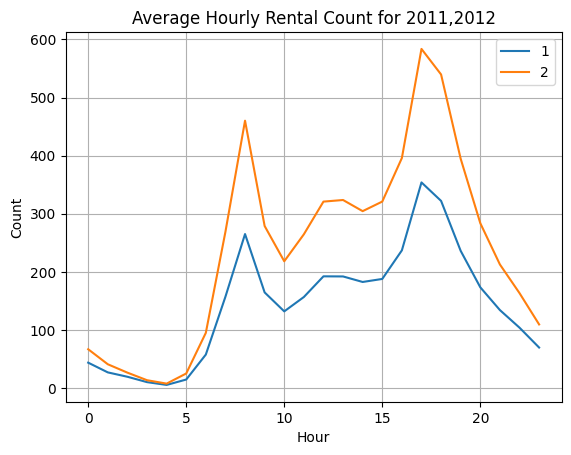

In [25]:
for year in average_year_hour.index.levels[0]:
    plt.plot(average_year_hour[year].index,average_year_hour[year],label=year)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Rental Count for 2011,2012')
plt.show()

### Demand per season

C:\Users\jay\AppData\Local\Temp\ipykernel_8088\4166391830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = train_df, x = 'season', y = 'count', palette = 'rainbow');


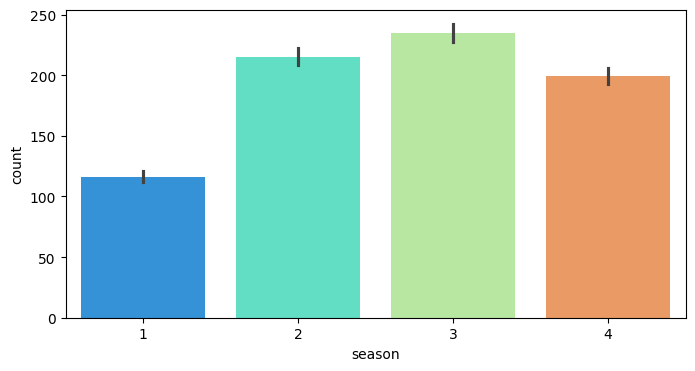

In [26]:
plt.figure(figsize = (8,4))
sns.barplot(data = train_df, x = 'season', y = 'count', palette = 'rainbow');

Demand was high during the summer and fall seasons while it drops during winter and spring season as the weather during these seasons might not be suitable for bike rentals.

### Demand as per holidays

C:\Users\jay\AppData\Local\Temp\ipykernel_8088\1649992271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = train_df, x = 'holiday', y = 'count', palette = 'rainbow');


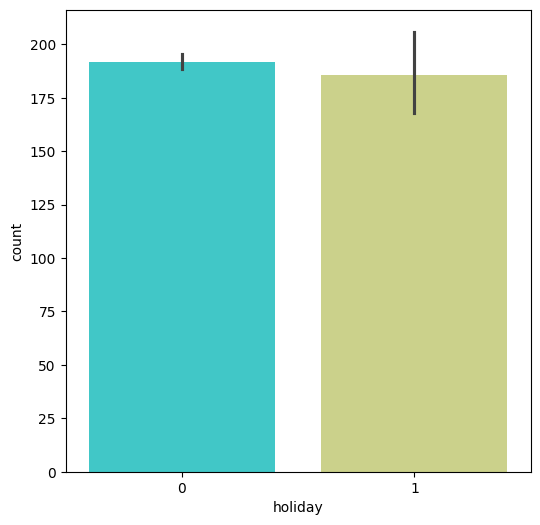

In [27]:
plt.figure(figsize=(6,6))
sns.barplot(data = train_df, x = 'holiday', y = 'count', palette = 'rainbow');

Demand was high during working days and low during holidays.

### Demand on working days

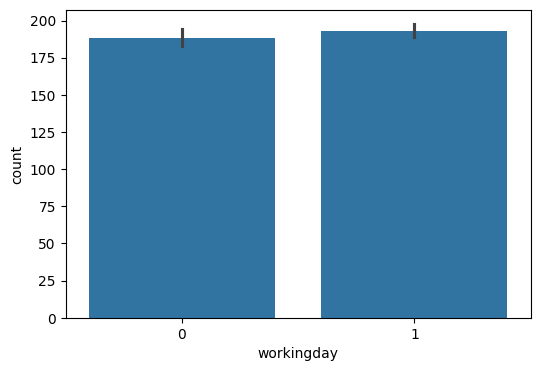

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(data = train_df, x = 'workingday', y = 'count');

It doesn't affect the demand much as it remains almost the same both the time, therefore we will have to drop this column.

### Visualization of the continuous varibles using Histogram

###### Continuous features - temp, atemp, humidity, windspeed, count

train_df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=train_df,edgecolor="black",linewidth=2,color='#a0e0b6')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=train_df,edgecolor="black",linewidth=2,color='#85b98d')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=train_df,edgecolor="black",linewidth=2,color='#3e936e')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=train_df,edgecolor="black",linewidth=2,color='#335d40')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

### Visualization of the Correlation Matrix of continuous features and understanding how it will affect the Target variable

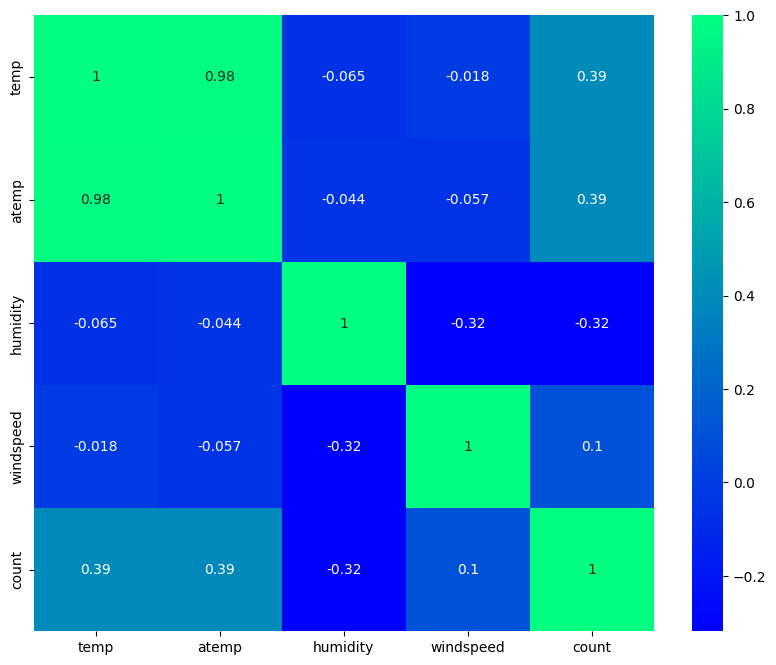

In [29]:
corrdata = train_df[["temp","atemp","humidity","windspeed","count"]]
corrmat = corrdata.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmat, annot = True, cmap= 'winter');

Here we can see there is no correlation affecting target variable

## Data Preprocessing

In [30]:
train_df["year"] = pd.to_numeric(train_df["year"])

### Performing One Hot Encoding on categorical features

season = pd.get_dummies(train_df['season'],prefix='season',drop_first=True)
weather = pd.get_dummies(train_df['weather'],prefix='weather',drop_first=True)
holiday = pd.get_dummies(train_df['holiday'],prefix='holiday',drop_first=True)
month = pd.get_dummies(train_df['month'],prefix='month',drop_first=True)
hour = pd.get_dummies(train_df['hour'],prefix='hour',drop_first=True)
train_df = pd.concat([train_df,season,weather,holiday,month,hour],axis=1)
train_df.drop(['season','weather','holiday','month','hour'], axis=1,inplace=True)

pd.set_option('display.max_columns',52)
train_df.head()

### Dropping the features with low correlation

In [31]:
train_df.drop(['date'], axis=1, inplace=True)

In [32]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,day of the week
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4,5


In [33]:
train_df.columns.to_series().groupby(train_df.dtypes).groups

{int32: ['month', 'hour', 'day of the week'], int64: ['season', 'holiday', 'workingday', 'weather', 'humidity', 'casual', 'registered', 'count', 'year'], float64: ['temp', 'atemp', 'windspeed']}

### Visualization of the Correlation Matrix of the preprocessed data

<Axes: >

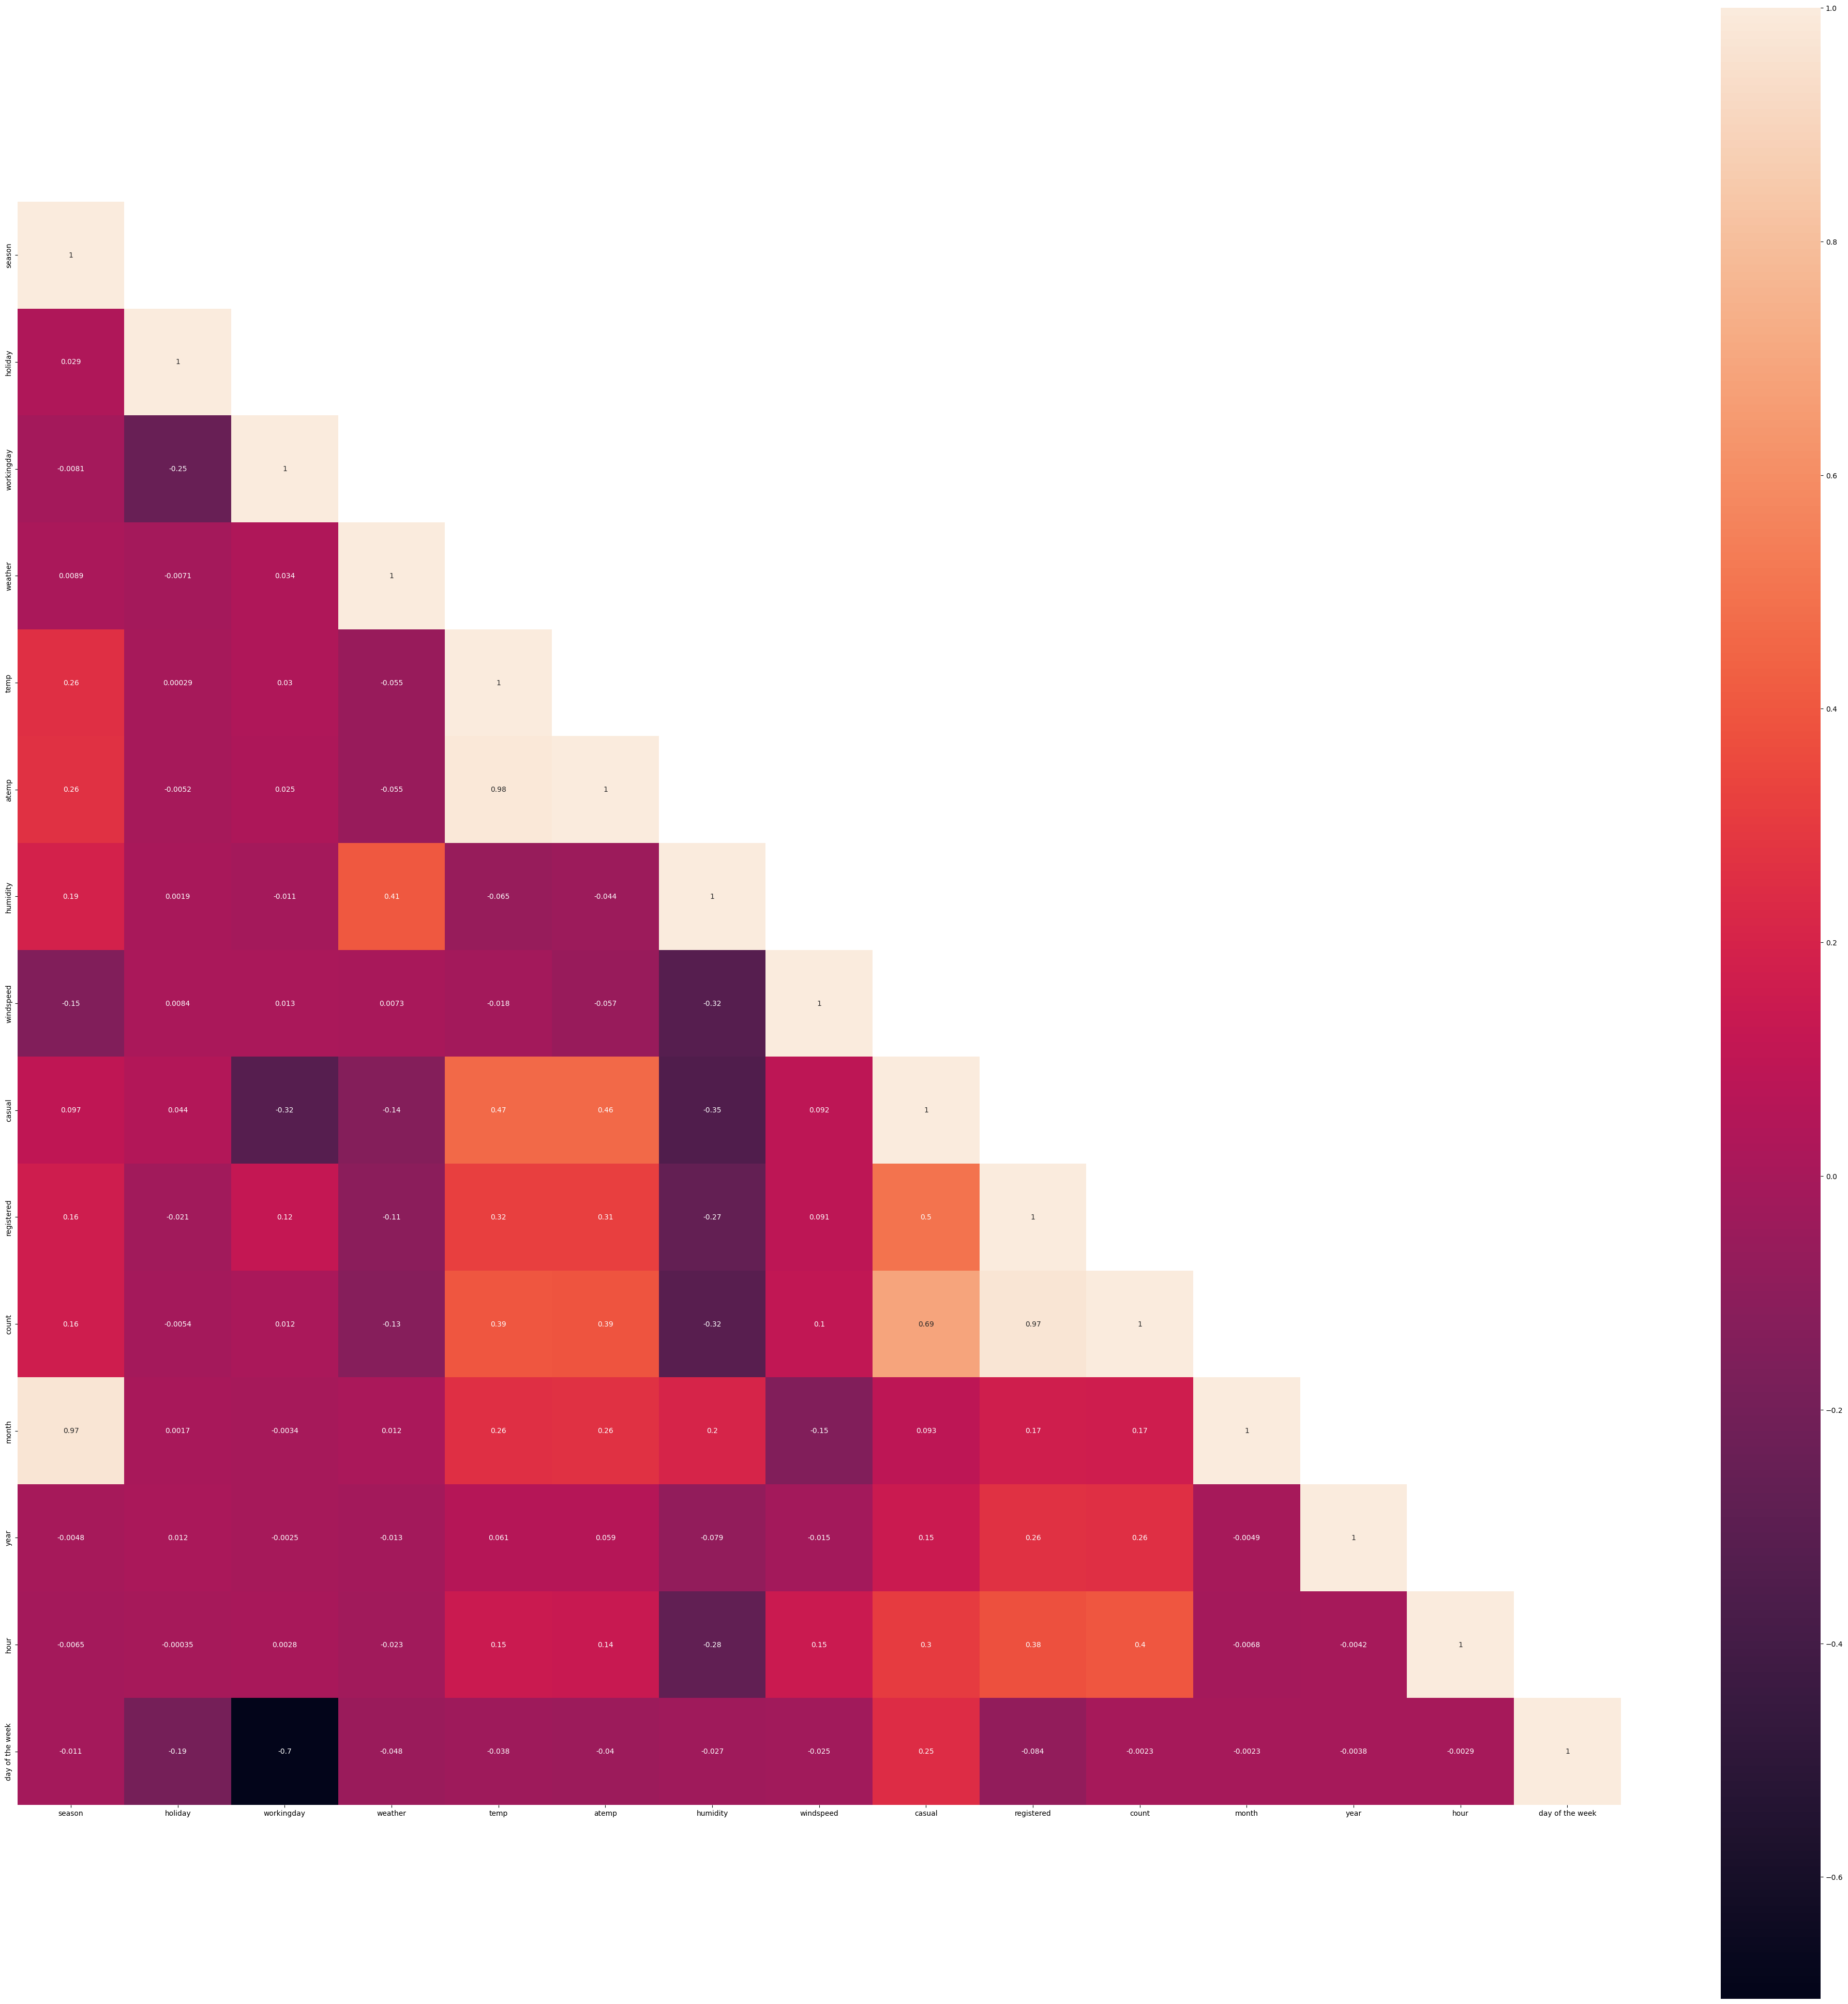

In [34]:
cor_mat= train_df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(50,50)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

### Splitting the data

In [35]:
X = train_df.drop('count',axis=1)

In [36]:
train_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,day of the week
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,2,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,2,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,2,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,2,22,2


In [37]:
X.shape

(10886, 14)

In [38]:
y = np.log(train_df['count'])

In [39]:
y.shape

(10886,)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 150)

### Using Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linear_rg = LinearRegression()

In [44]:
linear_rg.fit(X_train,y_train)

LinearRegression()

In [45]:
preds1 = linear_rg.predict(X_test)

In [46]:
preds1

array([5.04933059, 6.38246028, 2.64157735, ..., 5.85225371, 4.42236449,
       4.33008784])

In [47]:
from sklearn import metrics

In [48]:
r2_score = metrics.r2_score(y_test,preds1)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds1))
print('MSE:',metrics.mean_squared_error(y_test,preds1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds1)))


r2_score is:0.7419364093542371
MAE: 0.5748455207999009
MSE: 0.5766840901326596
RMSE: 0.7593971886520647


#### Accuracy -  87.21%

### Using Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
dt_rg = DecisionTreeRegressor(max_depth=5)

In [51]:
dt_rg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [52]:
preds2 = dt_rg.predict(X_test)

In [53]:
preds2

array([4.6792924 , 6.06120686, 0.69314718, ..., 5.81124524, 5.3606391 ,
       4.33683197])

In [54]:
r2_score = metrics.r2_score(y_test,preds2)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds2))
print('MSE:',metrics.mean_squared_error(y_test,preds2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds2)))

r2_score is:0.9905393893666996
MAE: 0.10992313281175049
MSE: 0.02114123740397452
RMSE: 0.14540026617573476


#### Accuracy -  99.05%

## After performing the model Decision Tree Regressor gave best result with 99.05% accuracy

In [55]:
import pickle

In [56]:
from pyexpat import model


with open ('Decision.pkl', 'wb') as file:
    pickle.dump(dt_rg,file)